# PRISM products in VirES - visualization of subauroral boundaries

This notebook demonstrates of the subaroral boundaries from the `MITx_LP_2F`, `MITxTEC_2F` and `PPIxFAC_2F` Swarm products retrieved by means of the vires client.


In [1]:
from viresclient import SwarmRequest

SERVER_URL = "https://vires.services/ows"


In [2]:
SPACECRAFT = 'A'
START_TIME = "2015-12-30T00:00:00Z"
END_TIME = "2016-01-02T00:00:00Z"
MIT_LP_TE_PEAK = 0x6

def _insert(list_, value):
    if value not in list_:
        list_.apped(value)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MOD{SPACECRAFT}_SC_1B")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'QDLon', 'Kp'],
    sampling_step="PT10S"
)
data_track = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()

print(data_track)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat'],
)
data_ne_min = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_ne_min)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F:ID")
request.set_products(
    measurements=['PointType'],
    auxiliaries=['QDLat'],
)
request.set_range_filter('PointType', MIT_LP_TE_PEAK, MIT_LP_TE_PEAK)
data_te_peak = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_te_peak)
assert (data_te_peak['PointType'].values == MIT_LP_TE_PEAK).all()

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}TEC_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat'],
)
data_tec_min = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_tec_min)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_PPI{SPACECRAFT}FAC_2F:ID")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat'],
)
data_ssfac = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_ssfac)


Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.483MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 25920)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30 ... 2016-01-01T23:59:50
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Longitude   (Timestamp) float64 -94.26 -94.26 -94.27 ... -95.37 -95.37
    Latitude    (Timestamp) float64 -25.88 -25.24 -24.6 ... 29.82 30.46 31.1
    Kp          (Timestamp) float64 2.3 0.0 0.0 0.0 0.0 ... 1.7 1.7 1.7 1.7 1.7
    QDLon       (Timestamp) float64 -18.99 -19.1 -19.22 ... -24.87 -24.9 -24.92
    QDLat       (Timestamp) float64 -15.46 -14.85 -14.24 ... 39.53 40.17 40.8
    Radius      (Timestamp) float64 6.832e+06 6.832e+06 ... 6.823e+06 6.823e+06
Attributes:
    Sources:         ['SW_OPER_AUX_KP__2__19980101T013000_20220407T193000_000...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.054MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 68)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T00:37:35.196999936 ... ...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    QDLat       (Timestamp) float64 57.14 58.0 66.07 59.68 ... 64.2 49.69 53.02
    Longitude   (Timestamp) float64 72.8 49.22 -140.3 ... -23.28 143.5 96.42
    Radius      (Timestamp) float64 6.818e+06 6.818e+06 ... 6.818e+06 6.818e+06
    Latitude    (Timestamp) float64 61.01 61.7 64.41 63.0 ... 63.66 55.69 57.22
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.063MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 46)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T00:37:41.196999936 ... ...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Longitude   (Timestamp) float64 72.85 49.28 25.7 2.2 ... -169.9 166.4 143.5
    PointType   (Timestamp) uint8 6 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6
    Latitude    (Timestamp) float64 60.63 61.26 61.94 62.09 ... 60.06 61.7 55.63
    QDLat       (Timestamp) float64 56.76 57.55 58.57 ... 56.88 56.46 49.63
    Radius      (Timestamp) float64 6.818e+06 6.818e+06 ... 6.818e+06 6.818e+06
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    ['PointType:6,6']


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.054MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 39)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T03:42:15 ... 2016-01-01...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    QDLat       (Timestamp) float64 67.61 67.48 67.74 ... 57.92 58.67 58.04
    Longitude   (Timestamp) float64 23.69 0.7023 151.7 ... 164.5 141.2 119.2
    Radius      (Timestamp) float64 6.817e+06 6.817e+06 ... 6.818e+06 6.817e+06
    Latitude    (Timestamp) float64 70.64 69.12 72.71 ... 63.13 64.15 62.94
Attributes:
    Sources:         ['SW_OPER_MITATEC_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.054MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 144)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T00:18:40.500000 ... 201...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    QDLat       (Timestamp) float64 55.39 63.47 59.65 ... 63.77 67.42 60.38
    Longitude   (Timestamp) float64 -94.91 -94.5 -118.0 ... -71.22 93.33 95.42
    Radius      (Timestamp) float64 6.82e+06 6.819e+06 ... 6.817e+06 6.817e+06
    Latitude    (Timestamp) float64 45.9 54.3 53.64 59.97 ... 55.43 71.98 64.65
Attributes:
    Sources:         ['SW_OPER_PPIAFAC_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


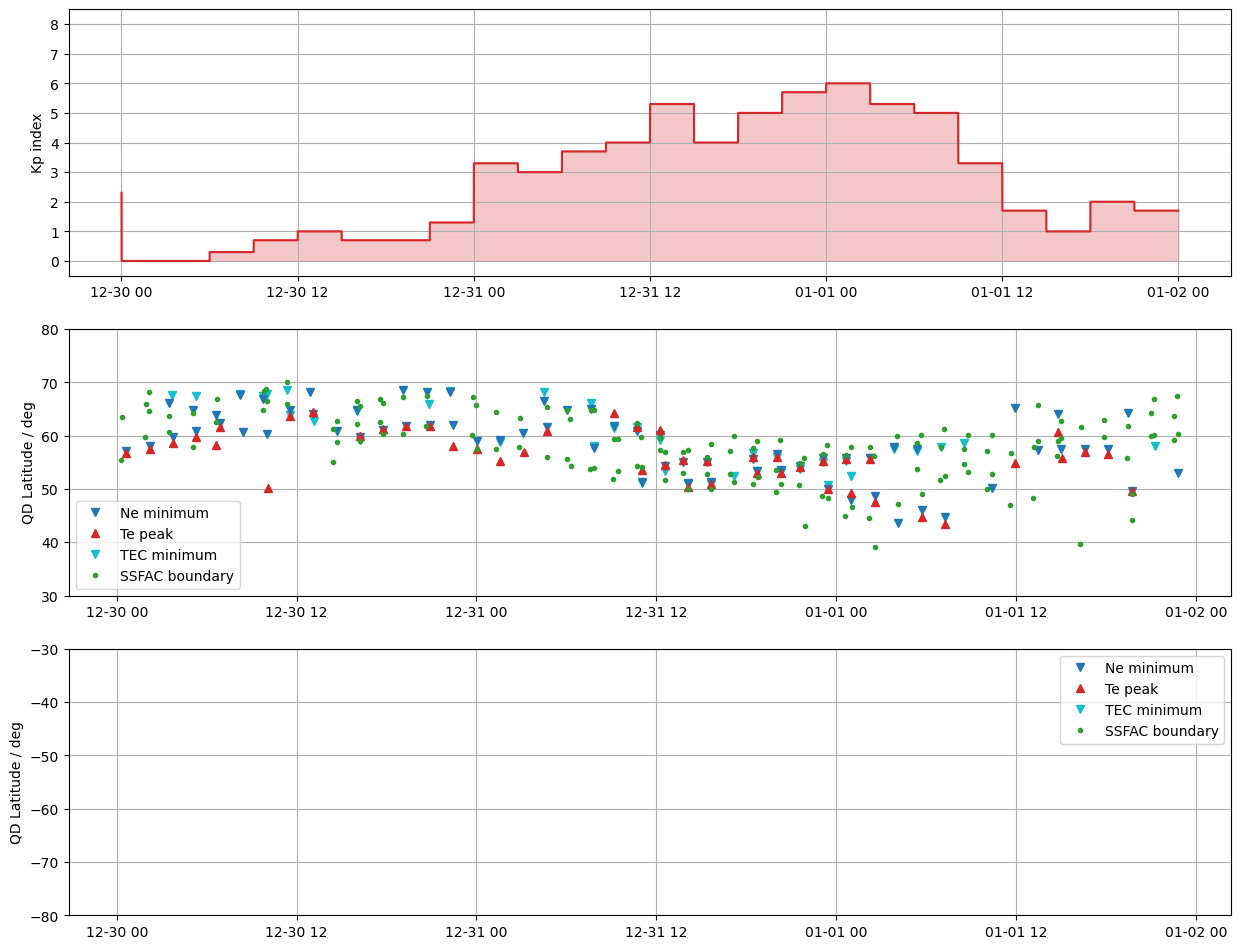

In [3]:
from matplotlib.pyplot import figure, subplot, show
%matplotlib inline

MIT_LP_TE_PEAK = 0x6

fig = figure(figsize=(15, 12), dpi=100)

ax = subplot(3, 1, 1)
ax.fill_between(data_track['Timestamp'].values, data_track['Kp'].values, color='tab:red', alpha=0.25)
h_kp, = ax.plot(data_track['Timestamp'].values, data_track['Kp'].values, '-', color='tab:red')
ax.set_ylim([-0.5, 8.5])
ax.set_ylabel("Kp index")
ax.grid()

ax = subplot(3, 1, 2)
h_tec_min, = ax.plot(data_tec_min['Timestamp'].values, data_tec_min['QDLat'].values, 'v', color='tab:cyan')
h_ne_min, = ax.plot(data_ne_min['Timestamp'].values, data_ne_min['QDLat'].values, 'v', color='tab:blue')
h_te_peak, = ax.plot(data_te_peak['Timestamp'].values, data_te_peak['QDLat'].values, '^', color='tab:red')
h_ssfac, = ax.plot(data_ssfac['Timestamp'].values, data_ssfac['QDLat'].values, 'o', color='tab:green', ms=3)
ax.set_ylim([30, 80])
ax.set_ylabel("QD Latitude / deg")
ax.grid()
ax.legend(
    [
        h_ne_min,
        h_te_peak,
        h_tec_min,
        h_ssfac,
    ],
    [
        'Ne minimum',
        'Te peak',
        'TEC minimum',
        'SSFAC boundary'
    ],
)


ax = subplot(3, 1, 3)
h_tec_min, = ax.plot(data_tec_min['Timestamp'].values, data_tec_min['QDLat'].values, 'v', color='tab:cyan')
h_ne_min, = ax.plot(data_ne_min['Timestamp'].values, data_ne_min['QDLat'].values, 'v', color='tab:blue')
h_te_peak, = ax.plot(data_te_peak['Timestamp'].values, data_te_peak['QDLat'].values, '^', color='tab:red')
h_ssfac, = ax.plot(data_ssfac['Timestamp'].values, data_ssfac['QDLat'].values, 'o', color='tab:green', ms=3)
ax.set_ylabel("QD Latitude / deg")
ax.set_ylim([-80, -30])
ax.grid()
ax.legend(
    [
        h_ne_min,
        h_te_peak,
        h_tec_min,
        h_ssfac,
    ],
    [
        'Ne minimum',
        'Te peak',
        'TEC minimum',
        'SSFAC boundary'
    ],
)
